In [1]:
import pandas as pd
# To ignore warnings, use the following code to make the display more attractive.
# Import seaborn and matplotlib.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np

sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
glass= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', header=None)
cols = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
              are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  -- 1 building_windows_float_processed
  -- 2 building_windows_non_float_processed
  -- 3 vehicle_windows_float_processed
  -- 4 vehicle_windows_non_float_processed (none in this database)
  -- 5 containers
  -- 6 tableware
  -- 7 headlamps

In [3]:
glass.shape

(214, 11)

In [4]:
glass.columns = cols

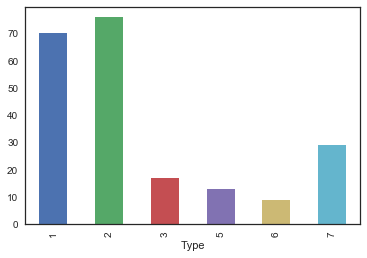

In [5]:
glass.groupby("Type").Id.count().plot(kind='bar')
#Type 2 and 1 are the most frequent glass types respectively. (Building windows, non float and float processed)

In [6]:
glass.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


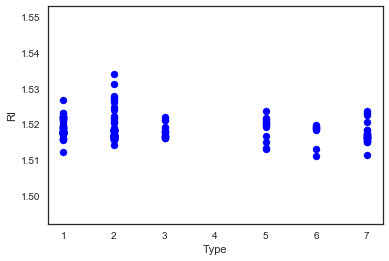

In [8]:
glass.plot(kind="scatter", x="Type", y="RI", color="blue", s=50)
plt.show()

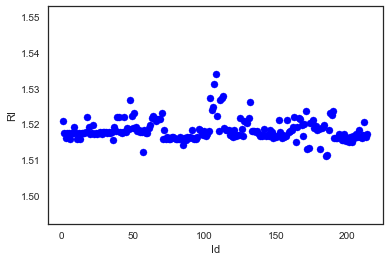

In [9]:
glass.plot(kind="scatter", x="Id", y="RI", color="blue", s=50)
plt.show()

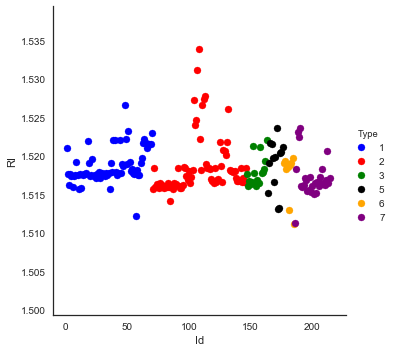

In [10]:
# using sns to create a graph by assigning each glass type an individual color.
import seaborn as sns
KS = {'color': ['blue', 'red', 'green','black','orange','purple']}
sns.FacetGrid(glass, hue_kws=KS, hue="Type", size=5) \
   .map(plt.scatter, "Id", "RI") \
   .add_legend()
plt.show()

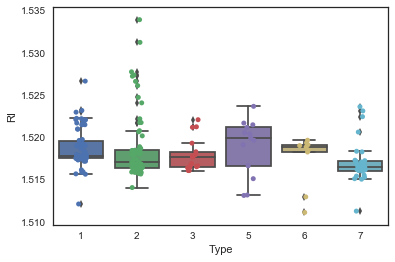

In [11]:
ax= sns.boxplot(x="Type", y="RI", data=glass)
ax= sns.stripplot(x="Type", y="RI", data=glass, 
                  jitter=True, edgecolor="blue")
plt.show()
plt.show()

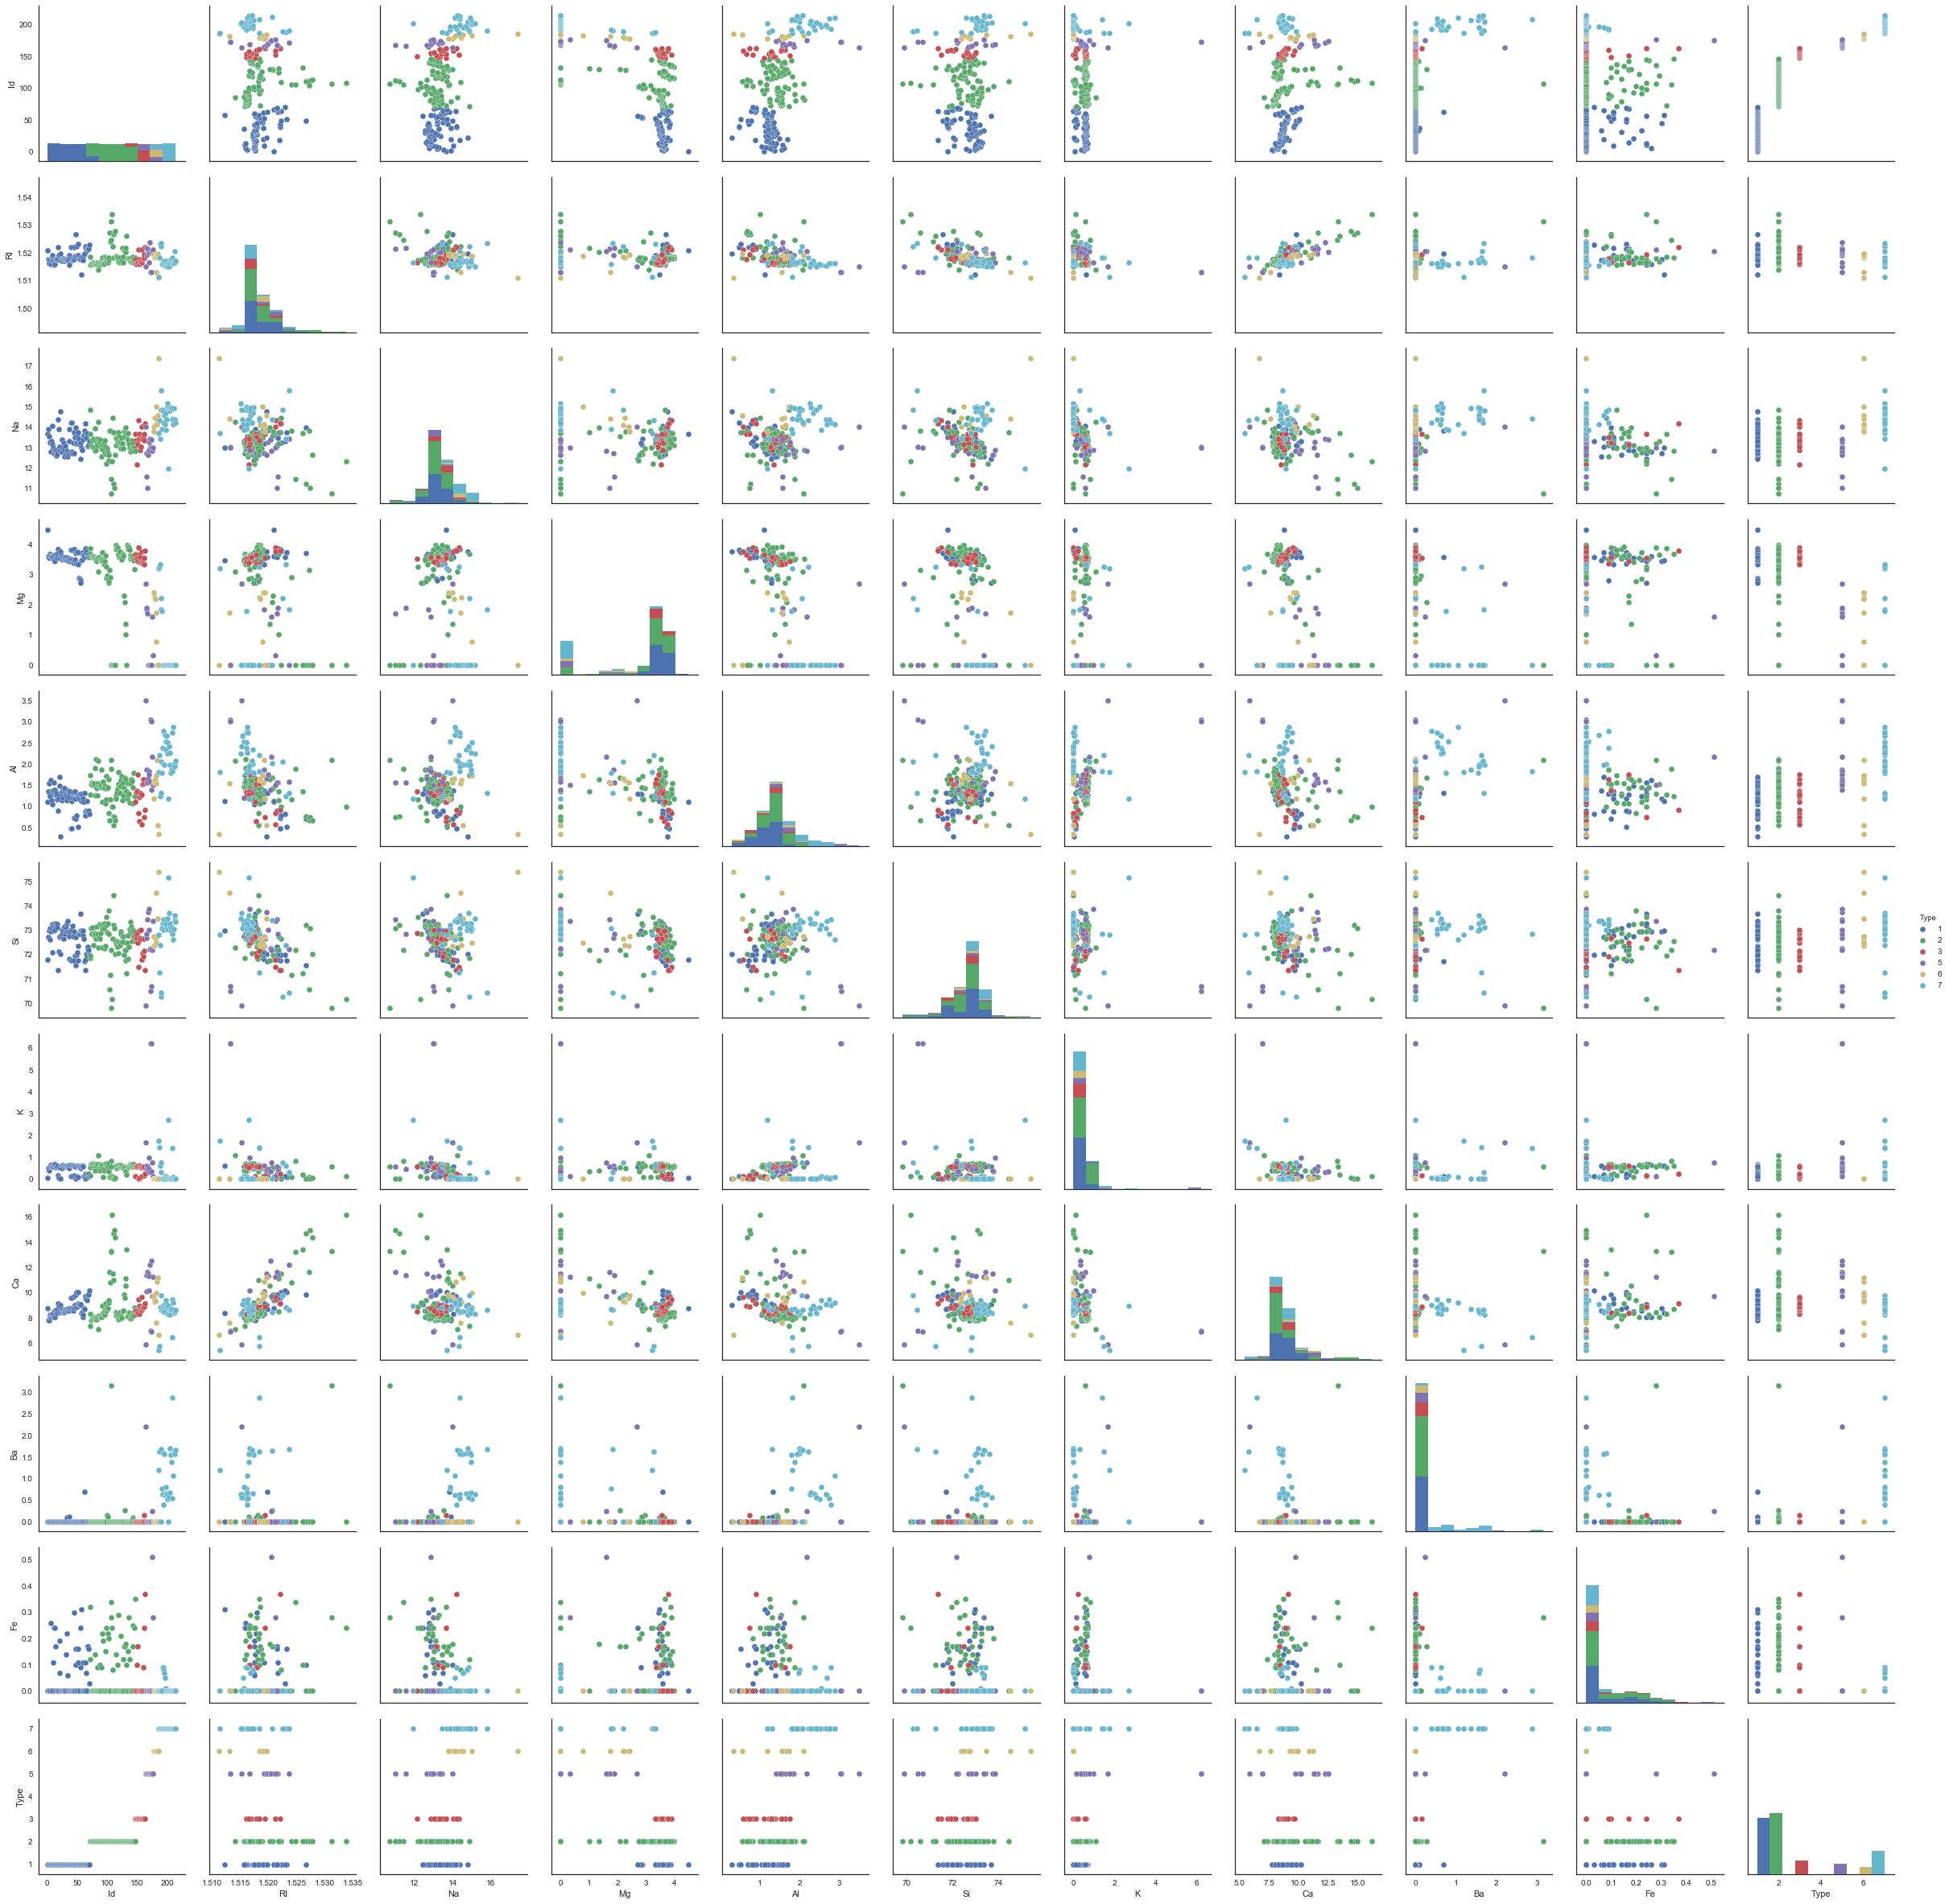

In [12]:
#Use pairplot to analyze the relationship between type for all attribute combinations. 
sns.pairplot(glass, hue="Type", size=3)
plt.show()

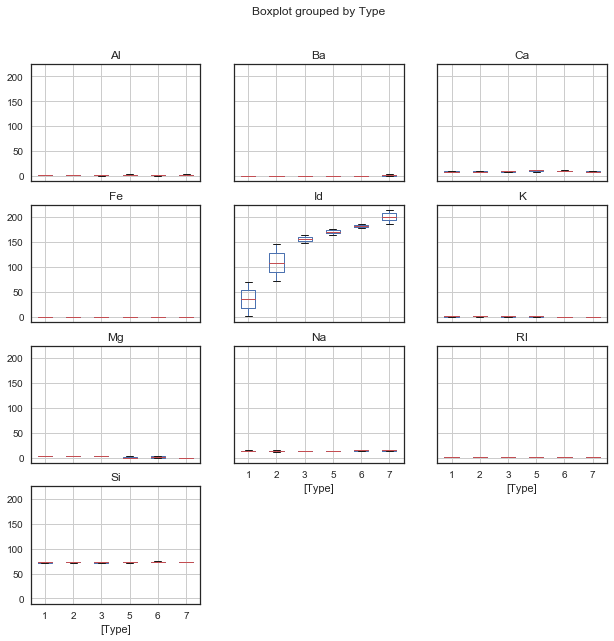

In [13]:
# To make a Pandas boxplot grouped by type, use .boxplot
glass.boxplot(by="Type", figsize=(10, 10))
plt.show()

In [14]:
glass.groupby('Type').describe()

Al                                                          Ba  \
     count      mean       std   min     25%   50%     75%   max count   
Type                                                                     
1     70.0  1.163857  0.273158  0.29  1.1125  1.23  1.3275  1.69  70.0   
2     76.0  1.408158  0.318340  0.56  1.2475  1.46  1.5700  2.12  76.0   
3     17.0  1.201176  0.347489  0.58  0.9100  1.28  1.3800  1.76  17.0   
5     13.0  2.033846  0.693920  1.40  1.5600  1.76  2.1700  3.50  13.0   
6      9.0  1.366667  0.571861  0.34  1.1900  1.56  1.6600  2.09   9.0   
7     29.0  2.122759  0.442726  1.19  1.8700  2.06  2.4200  2.88  29.0   

                ...          RI             Si                              \
          mean  ...         75%      max count       mean       std    min   
Type            ...                                                          
1     0.012714  ...    1.519560  1.52667  70.0  72.619143  0.569484  71.35   
2     0.050263  ...    1.518487  1.53393  76.0  72.598026  0.724573  69.81   
3     0.008824  ...    1.518320  1.52211  17.0  72.404706  0.512276  71.36   
5     0.187692  ...    1.521190  1.52369  13.0  72.366154  1.282319  69.89   
6     0.000000  ...    1.519160  1.51969   9.0  73.206667  1.079467  72.37   
7     1.040000  ...    1.517270  1.52365  29.0  72.965862  0.940234  70.26   

                                     
        25%     50%      75%    max  
Type                                 
1     72.08  72.815  73.0175  73.70  
2     72.33  72.735  73.0625  74.45  
3     72.04  72.640  72.7000  73.01  
5     72.18  72.690  73.3900  73.88  
6     72.50  72.740  73.4800  75.41  
7     72.86  73.110  73.3600  75.18  

[6 rows x 80 columns]

In [15]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


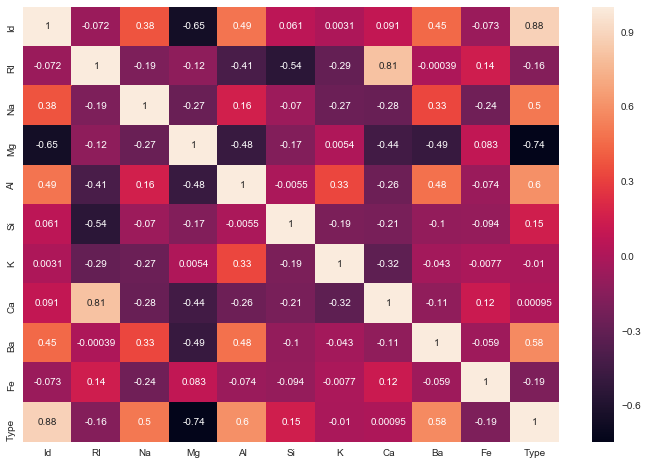

In [17]:
plt.figure(figsize=(12, 8))

glass_corr = glass.corr()
sns.heatmap(glass_corr, 
            xticklabels = glass_corr.columns.values,
            yticklabels = glass_corr.columns.values,
            annot = True);

In [18]:
glass.groupby('Fe').max().head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Type
Fe,,,,,,,,,,
0.00,214,1.52777,17.38,4.49,3.50,75.41,6.21,14.96,2.88,7
0.01,197,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,7
0.03,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,1
0.05,196,1.51545,14.14,0.00,2.68,73.39,0.08,9.07,0.61,7
0.06,34,1.51753,12.57,3.47,1.38,73.39,0.60,8.55,0.00,1


In [19]:
glass.groupby('Na').max().head()

,Id,RI,Mg,Al,Si,K,Ca,Ba,Fe,Type
Na,,,,,,,,,,
10.73,107,1.53125,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
11.02,112,1.52739,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
11.03,167,1.52151,1.71,1.56,73.44,0.58,11.62,0.00,0.00,5
11.23,111,1.52664,0.00,0.77,73.21,0.00,14.68,0.00,0.00,2
11.45,106,1.52475,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2


In [20]:
glass.groupby('Mg').max().head()

,Id,RI,Na,Al,Si,K,Ca,Ba,Fe,Type
Mg,,,,,,,,,,
0.00,214,1.53393,17.38,3.04,75.41,6.21,16.19,3.15,0.34,7
0.33,176,1.52119,12.97,1.51,73.39,0.13,11.27,0.00,0.28,5
0.78,182,1.51888,14.99,1.74,72.50,0.00,9.95,0.00,0.00,6
1.01,131,1.52177,13.75,1.36,72.19,0.33,11.14,0.00,0.00,2
1.35,130,1.52020,13.98,1.63,71.76,0.39,10.56,0.00,0.18,2


In [21]:
glass.groupby('Al').max().head()

,Id,RI,Na,Mg,Si,K,Ca,Ba,Fe,Type
Al,,,,,,,,,,
0.29,22,1.51966,14.77,3.75,72.02,0.03,9.00,0.0,0.00,1
0.34,185,1.51115,17.38,0.00,75.41,0.00,6.65,0.0,0.00,6
0.47,40,1.52213,14.21,3.82,71.77,0.11,9.57,0.0,0.00,1
0.51,51,1.52320,13.72,3.72,71.75,0.09,10.06,0.0,0.16,1
0.56,184,1.51969,14.56,0.00,74.45,0.00,11.22,0.0,0.00,6


In [22]:
glass.groupby('Si').max().head()

,Id,RI,Na,Mg,Al,K,Ca,Ba,Fe,Type
Si,,,,,,,,,,
69.81,107,1.53125,10.73,0.00,2.10,0.58,13.30,3.15,0.28,2
69.89,164,1.51514,14.01,2.68,3.50,1.68,5.87,2.20,0.00,5
70.16,108,1.53393,12.30,0.00,1.00,0.12,16.19,0.00,0.24,2
70.26,189,1.52247,14.86,2.20,2.06,0.76,9.76,0.00,0.00,7
70.43,190,1.52365,15.79,1.83,1.31,0.31,8.61,1.68,0.00,7


In [23]:
glass.groupby('Ca').max().head()

,Id,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
Ca,,,,,,,,,,
5.43,186,1.51131,13.69,3.20,1.81,72.81,1.76,1.19,0.0,7
5.79,187,1.51838,14.32,3.26,2.22,71.25,1.46,1.63,0.0,7
5.87,164,1.51514,14.01,2.68,3.50,69.89,1.68,2.20,0.0,5
6.47,208,1.51831,14.39,0.00,1.82,72.86,1.41,2.88,0.0,7
6.65,185,1.51115,17.38,0.00,0.34,75.41,0.00,0.00,0.0,6


In [24]:
glass.groupby('K').max().head()

,Id,RI,Na,Mg,Al,Si,Ca,Ba,Fe,Type
K,,,,,,,,,,
0.00,214,1.52739,17.38,3.90,2.74,75.41,14.96,1.71,0.09,7
0.02,48,1.52667,13.99,3.70,0.71,71.57,9.82,0.00,0.10,1
0.03,22,1.51966,14.77,3.75,0.29,72.02,9.00,0.00,0.00,1
0.04,199,1.51623,14.38,0.00,2.79,73.46,9.08,0.64,0.09,7
0.05,200,1.51609,15.01,0.00,2.51,73.05,8.83,0.53,0.00,7


In [25]:
glass.groupby('Ba').max().head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
Ba,,,,,,,,,,
0.00,202,1.53393,17.38,4.49,3.04,75.41,6.21,16.19,0.37,7
0.06,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.25,2
0.09,142,1.51851,13.20,3.63,1.23,72.97,0.61,8.56,0.22,2
0.11,101,1.51909,13.89,3.53,1.44,73.27,0.57,8.79,0.22,2
0.14,100,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.00,2


In [26]:
glass.groupby('RI').max().head()

,Id,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,,,,,,,,,,
1.51115,185,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
1.51131,186,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
1.51215,57,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
1.51299,181,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6
1.51316,172,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5


In [27]:
# import the required packages 
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [28]:
X = glass.iloc[:,1:10]
y = glass.Type

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(149, 9) (65, 9) (149,) (65,)


In [30]:
# Standardize the data before modeling  
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [54]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski',weights='distance')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [55]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

#Originally k =5 is selected, accuracy is 0.69

Accuracy: 0.69
Misclassified samples: 20


In [56]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, k_list))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,p=2, weights='distance',metric='minkowski')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


optimal k is: 1


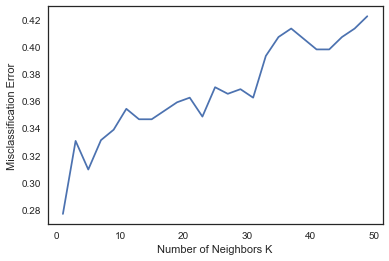

In [57]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = (neighbors[MSE.index(min(MSE))])
print("optimal k is:",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#optimal K is 1, but this way overfitts the data

** What would be the best value of K to choose??? Why? **

Apply Diagnostics:

A simple and effective way to remedy skewed class distributions is by implementing weighed voting. The class of each of the K neighbors is multiplied by a weight proportional to the inverse of the distance from that point to the given test point. This ensures that nearer neighbors contribute more to the final vote than the more distant ones. How can you do this in Sklean Knearestneighbor class?
 


In [58]:
# adding weights = 'distance' in sklearn knearestneighbor, which is implemented in the codes above

Changing the distance metric for different applications may help improve the accuracy of the algorithm. Which of other distance measures can you try? Do hem improve your model? some of them do, here's the results:

Minskowski and Euclidean: Accuracy: 0.69 , k=3
Hamming:Accuracy: 0.55, k=9 #way off
Cosine:Accuracy:0.69,k=15
Correlation:Accuracy: 0.69,k=15
Cityblock:Accuracy: 0.69, k=5
l1:Accuracy: 0.69, k=5
l2: Accuracy:0.69, k=3
manhattan:Accuracy: 0.69, k=5


In [59]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cityblock',weights='distance')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, k_list))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='cityblock')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = (neighbors[MSE.index(min(MSE))])
print("optimal k is:",optimal_k)

#optimal k is still 1, but I went ahead and used my original assumption of k=5, I used cityblock distance method, accuracy is now 0.74


Accuracy: 0.74
Misclassified samples: 17
optimal k is: 1


Rescaling your data makes the distance metric more meaningful. For instance, given 2 features height and weight, an observation such as x=[180,70] will clearly skew the distance metric in favor of height. One way of fixing this is by column-wise subtracting the mean and dividing by the standard deviation. Scikit-learn’s normalize() method can come in handy. would this improve the results? How can you do this in Sklearn?

In [60]:
from sklearn import preprocessing
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
k_list= list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, k_list))

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance',metric='cityblock')
    scores = cross_val_score(knn, X_train_norm, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = (neighbors[MSE.index(min(MSE))])
print("optimal k is:",optimal_k)

knn = KNeighborsClassifier(n_neighbors=5, metric='cityblock',weights='distance')
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#normalization increased from 0.74 to 0.75, previously data was standardized

optimal k is: 3
Accuracy: 0.75
Misclassified samples: 16


Use Dimensionality reduction techniques like PCA:

Documentation

 from sklearn.decomposition import PCA
should be executed prior to appplying KNN and help make the distance metric more meaningful.

After applying and testing for these diagnostics, how the model performance has improved? What is the final confusion matric that you can share? What is overall accuracy of the model?

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4).fit(X_train_norm)

In [62]:
eig_vect = pca.components_

In [63]:
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cityblock',weights='distance')
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#I used the first 4 PCAs, accuracy went up from 75% to 80%

Accuracy: 0.80
Misclassified samples: 13


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[20,  1,  2,  0,  0,  0],
       [ 3, 15,  1,  0,  0,  0],
       [ 4,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  1,  7]], dtype=int64)